In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml
machine= fetch_openml(name='machine_cpu',version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
type(machine)

sklearn.utils._bunch.Bunch

In [ ]:
machine.details

{'id': '230',
 'name': 'machine_cpu',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'contributor': 'L. Torgo',
 'upload_date': '2014-04-23T13:20:36',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/3667/machine_cpu.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0230/dataset_230.pq',
 'file_id': '3667',
 'default_target_attribute': 'class',
 'version_label': '1',
 'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html',
 'tag': ['Computer Systems', 'Machine Learning', 'OpenML-Reg19'],
 'visibility': 'public',
 'original_data_url': 'http://www.ics.uci.edu/~mlearn/MLSummary.html',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0230/dataset_230.pq',
 'status': 'active',
 'processing_date': '2020-11-20 19:15:43',
 'md5_checksum': 'e26d62e83069b74dff6cf492e06868a0'}

In [ ]:
machine.feature_names

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

In [ ]:
mach=machine.frame

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(machine.data,test_size=0.2,random_state=20)

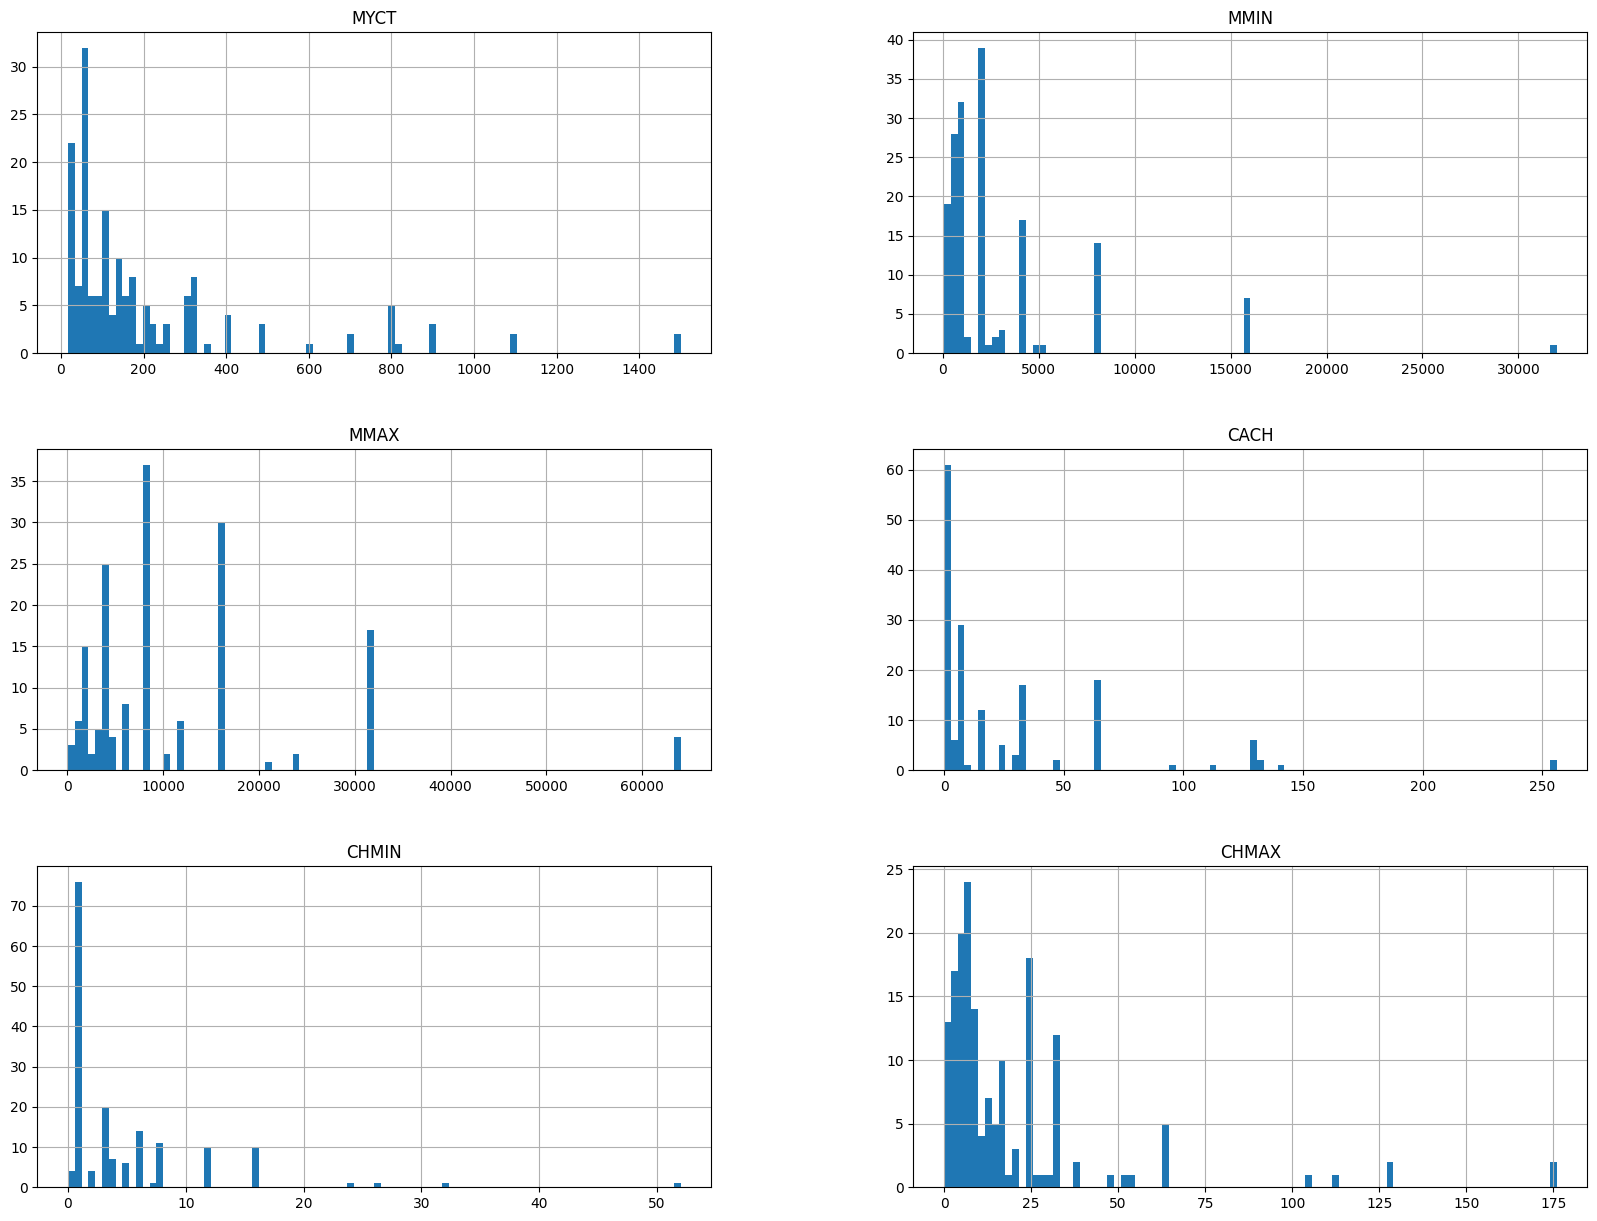

In [ ]:
train_data.hist(bins=90,figsize=(20,15))
plt.show()

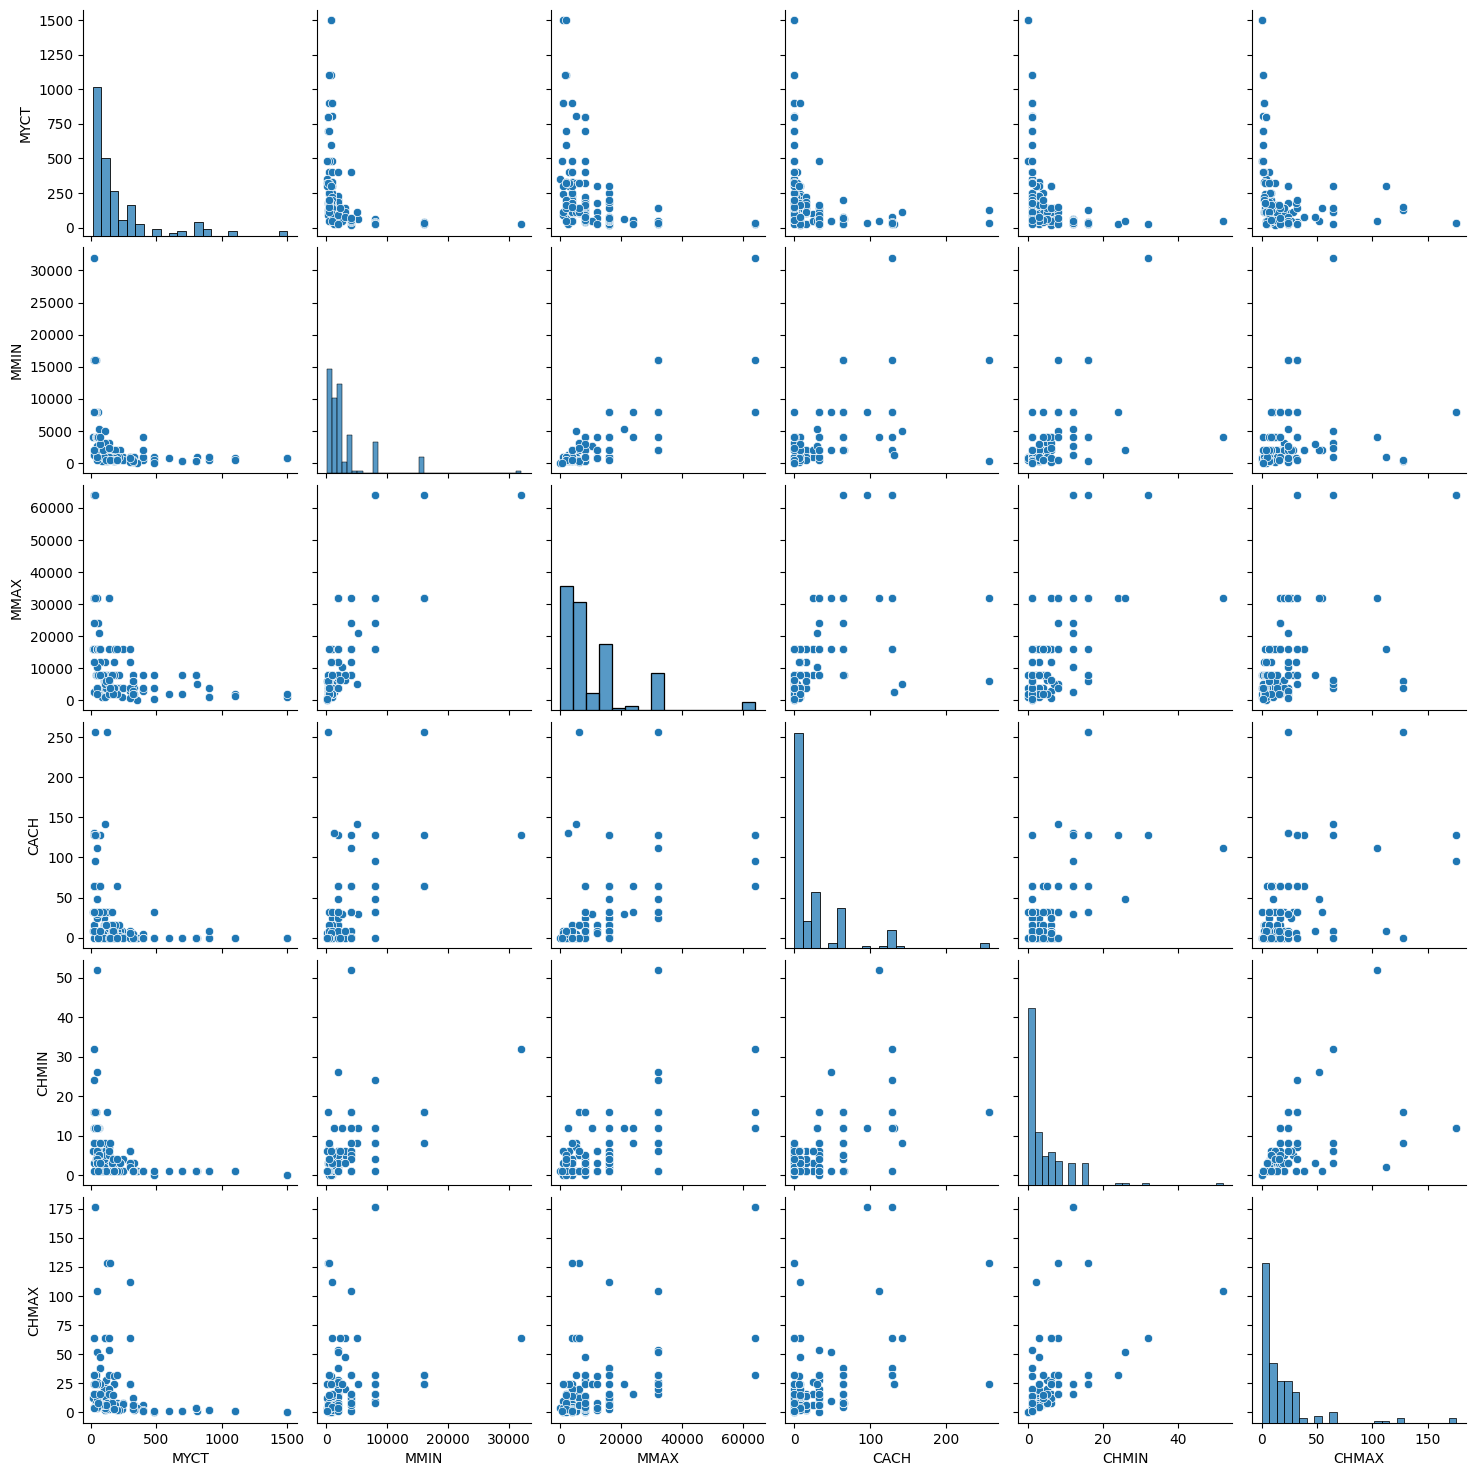

In [ ]:
sns.pairplot(train_data)

In [ ]:
train_data.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,207.958084,2900.826347,11761.161677,26.071856,4.760479,18.616766
std,266.772823,4165.950964,12108.332354,42.410014,6.487439,27.489919
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000
75%,232.500000,3100.000000,16000.000000,32.000000,6.000000,24.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000


In [ ]:
train_data.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
169,38.0,4000.0,16000.0,128.0,16.0,32.0
90,140.0,2000.0,32000.0,32.0,1.0,54.0
191,26.0,8000.0,32000.0,64.0,12.0,16.0
96,26.0,16000.0,32000.0,64.0,8.0,24.0
206,125.0,2000.0,8000.0,0.0,2.0,14.0


In [ ]:
train_data.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
dtype: int64

In [ ]:
corr=train_data.corr()
corr

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
MYCT,1.000000,-0.327518,-0.362041,-0.322102,-0.326931,-0.245745
MMIN,-0.327518,1.000000,0.763665,0.537194,0.596676,0.277127
MMAX,-0.362041,0.763665,1.000000,0.528262,0.589548,0.523307
CACH,-0.322102,0.537194,0.528262,1.000000,0.617575,0.489207
CHMIN,-0.326931,0.596676,0.589548,0.617575,1.000000,0.522649
CHMAX,-0.245745,0.277127,0.523307,0.489207,0.522649,1.000000


In [ ]:
X_train=train_data.drop('MMIN',axis=1)
y_train=train_data['MMIN']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scale_pipe = Pipeline([('scaler', StandardScaler())])
scaler=StandardScaler()
X_train_scaled=scale_pipe.fit_transform(X_train)

Training Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(min_samples_split=2,bootstrap=True, random_state=42,n_jobs=-1)
forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

Evaluating Random Forest Regressor

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

851.7670393107037

In [ ]:
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Improving Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
params_grid = {
     'n_estimators': [100, 200, 300,400,500], 'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,215,16,17,18,19,20]}

grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42),params_grid,verbose=1,cv=5)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 215, 16, 17, 18, 19,
                                            20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'max_leaf_nodes': 9, 'n_estimators': 300}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_leaf_nodes=9, n_estimators=300,
                      random_state=42)

In [ ]:
forest_best = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = forest_best.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1166.7820203731765

In [ ]:
X_test = test_data.drop('MMIN',axis=1)
y_test = test_data['MMIN']

test_scaled=scale_pipe.transform(X_test)

y_pred = forest_best.predict(test_scaled)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

876.6297223181356